### Convert Oculus sonar image to Range-azimuth image for testing
 

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

(1080, 1920, 3)


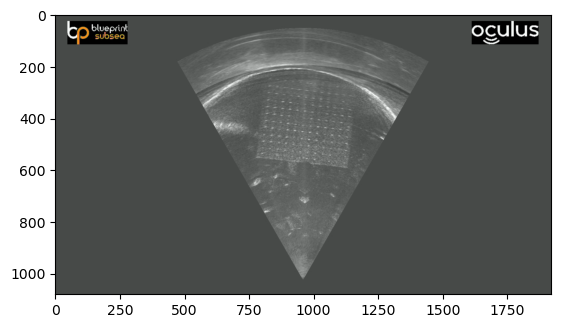

In [3]:
# Load image
img_path = r"/home/ychen921/808E/project2/Data/Set3/Set3/Oculus3/Oculus3-6.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Range-azimuth image
X_RES = 267
Y_RES = 1400
sonar_image = np.zeros((Y_RES, X_RES))

print(img.shape)
plt.imshow(img)

### R0 X0 and Range in pixel
X0 = 959
<br>
y0 = 1025
<br> 
Range length in pixel = 971

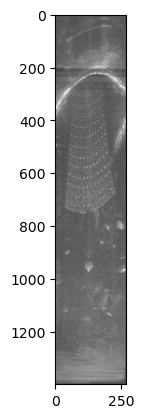

In [8]:
R = np.arange(0.0025, 3.5025, 0.0025)
Az = np.radians(np.arange(-30, 30, 0.225))

x0 = 959
y0 = 1025
R_bold = 971
for i in range(Y_RES):
    r = R[i]
    for j in range(X_RES):
        theta = Az[j]
        x = int(x0 + (R_bold/3.5)*r*np.sin(theta))
        y = int(y0 - (R_bold/3.5)*r*np.cos(theta))
        sonar_image[i,j] = img[y,x]

plt.imshow(np.flip(sonar_image).astype(np.uint8))

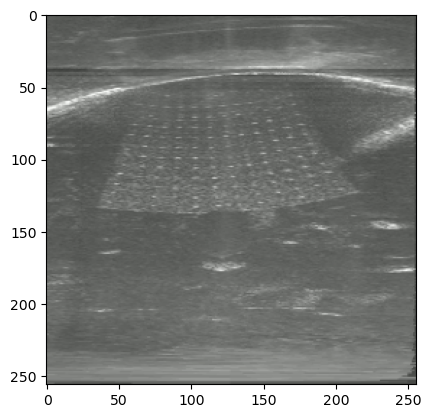

In [12]:
show_img = np.flip(sonar_image).astype(np.uint8)
show_img = cv2.resize(show_img, (256, 256), interpolation = cv2.INTER_LINEAR)
plt.imshow(show_img)